In [ ]:
import sys

sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/kgbuilder')

In [ ]:
!pip install rdflib
!pip install datashader

!pip install --upgrade networkx==2.6 scipy==1.8.0

In [ ]:
from rdflib import Graph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph,rdflib_to_networkx_digraph
import networkx as nx
import matplotlib.pyplot as plt

import requests

import pandas as pd

import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle


from itertools import chain

import scipy

In [ ]:
from utils import *
from visuals import *
from queries import *

In [ ]:
prune_policy=['deadend','isolated']
G,l=star_merging_pipeline(2, query_queer_world, prune_policy)

In [ ]:
g=networkx_to_rdflib_graph(G)
print(G)
print(rdflib_to_networkx_digraph(g))

DiGraph with 145 nodes and 175 edges
DiGraph with 145 nodes and 175 edges


In [ ]:
from crawler import *

In [ ]:
new_G,l=crawler_process(G, 20, 1, 5, prune_policy, n_max=40, people_list=l)

10
['Q1266546']
[]
13
['Q592']
[rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Thing'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'), rdflib.term.URIRef('http://wikiba.se/ontology#NormalRank'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Restriction'), rdflib.term.URIRef('http://wikiba.se/ontology#ExternalId'), rdflib.term.Literal('Mann für Mann', lang='en'), rdflib.term.URIRef('http://wikiba.se/ontology#BestRank'), rdflib.term.Literal('National Library of Israel Names and Subjects Authority File', lang='en'), rdflib.term.URIRef('http://wikiba.se/ontology#Statement'), rdflib.term.Literal('arz'), rdflib.term.URIRef('http://wikiba.se/ontology#Property'), rdflib.term.Literal('Rotten Tomatoes ID', lang='en'), rdflib.term.Literal('59815702'), rdflib.term.Literal('given name', lang='en'), rdflib.term.URIRef('http://wikiba.se/ontology#WikibaseItem'), rdflib.term.Literal('2015-08-13T00:00:00+00:00', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#dateTime'))

In [ ]:
print(l)

['Q86339', 'Q1554606', 'Q4583', 'Q187814', 'Q125037', 'Q66843', 'Q85563', 'Q84576', 'Q2020790', 'Q61174', 'Q69870', 'Q1648159', 'Q82222', 'Q61483', 'Q166312', 'Q1570300', 'Q106673', 'Q69022', 'Q61597', 'Q93349', 'Q83158', 'Q69638', 'Q177011', 'Q1633135', 'Q214042', 'Q1566335', 'Q71823', 'Q70764', 'Q92511', 'Q1690964', 'Q68486', 'Q60793', 'Q1543207', 'Q160456', 'Q1543148', 'Q1775181', 'Q2141920', 'Q1654116', 'Q239533', 'Q62441', 'Q1523288', 'Q104358', 'Q60964', 'Q68822']


Force-directed

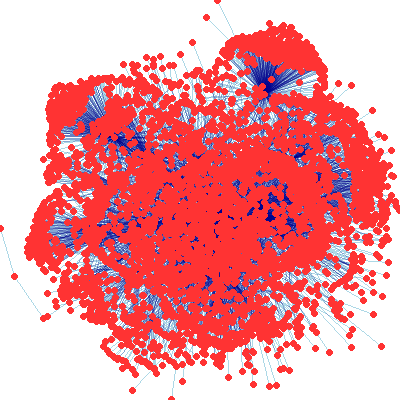

In [ ]:
image=create_plot_graph_force_directed(new_G)
tf.Images(image).cols(1)

In [ ]:
from networkx.readwrite import json_graph
import json

g_json=json_graph.node_link_data(new_G)
json.dump(g_json,open("graph.json","w"))